<center> <h1>  Assignment 4 -  week 7 </h1> </center>
<center> <h3> George Adamov </h3> </center>
<center> <h3> FU Matr.Nr.: 4350905 </h3> </center>

In [83]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial import Voronoi, voronoi_plot_2d
import scipy.cluster.hierarchy as sch


## 7.1 Generate Data

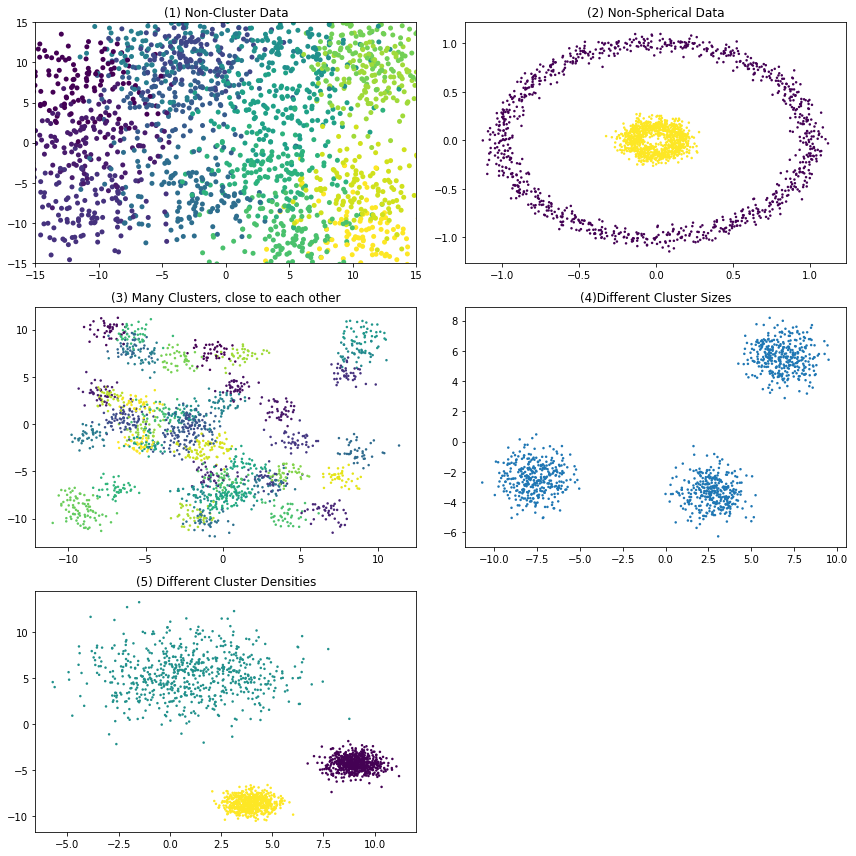

None


In [3]:


plt.figure(figsize=(12, 12))
# (1) Non-Cluster Data
X1, y1 = make_blobs(n_samples=2000, centers=[(-12, 8), (-11, 0), (-11, -8), 
                                           (-3, 12), (-3.5, 6), (-3, -6), (-4.5, 12), 
                                           (5, 12), (4, 4), (4, -4), (5.5, -11.5),
                                            (12, 12), (11.8, 7), (11, -6), (12, -12)], n_features=2, cluster_std=3.0)
plt.subplot(321)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1, s=25, edgecolor='none')
plt.axis([-15, 15, -15, 15])
plt.title("(1) Non-Cluster Data")

# (2) Non-Spherical Data
X2, y2 = make_circles(n_samples=2000, factor=.15, noise=0.05)
plt.subplot(322)
plt.scatter(X2[:, 0], X2[:, 1], marker='.', c=y2, s=25, edgecolor='none')
plt.title("(2) Non-Spherical Data")

# (3) Many Clusters, close to each other
X3, y3 = make_blobs(n_samples=2000, n_features=2, centers=50, cluster_std=0.7)
plt.subplot(323)
plt.scatter(X3[:, 0], X3[:, 1], marker='.', c=y3, s=25, edgecolor='none')
plt.title("(3) Many Clusters, close to each other")

# (4) Different Cluster Sizes
X4, y4 = make_blobs(n_samples=2000, n_features=2, centers = 3, cluster_std=1)
X4 = np.vstack((X4[y == 0][:1600], X4[y == 1][:200], X4[y == 2][:200]))
plt.subplot(324)
plt.scatter(X4[:, 0], X4[:, 1], marker='.', s=25, edgecolor='none')
plt.title("(4)Different Cluster Sizes")


# (5) Different Cluster Densities
X5, y5 = make_blobs(n_samples=2000, n_features=2, centers = 3, cluster_std=[0.7, 2.5, 0.7])
plt.subplot(325)
plt.scatter(X5[:, 0], X5[:, 1], marker='.', c=y5, s=25, edgecolor='none')
plt.title("(5) Different Cluster Densities")
plt.tight_layout()
print(plt.show())


Eaach of the 5 datasets consist of 2000 samples and two feature variables. In the *(1)\_Non\_Cluster data*  15 cluster centers with high standard deviation were plotted. In the *(2) Non Spherical data* there are two features with high distance btw them. In *(3) Many Clusters* 50 clusters were plotted with standard deviation 0.7 of each one. In *(4) Different Cluster Sizes* 1600 samples are used for the size of one of the three clusters, both the rest account for 200 samples; standard deviation is set to one. In *(5) Different Cluster Densities* one of the clusters has standard deviation of 0.7 and others 2.5

## 7.2 Unsupervised Learning: k-Means Clustering


After creating a k-Means function using the KMeans package with the sklearn python library,  we fit to the data. The function  uses the  K-Means++ algorithm by default. This algorithm specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm. Here optimize the random choice of the  cluster centroid. Hence one is more likely to find a solution that is competitive to the optimal K-Means solution while using the K-Means++ initialization.  
Then to find the optimal number of clusters we plot a graph, also known as an elbow curve, where the x-axis  represents the number of clusters and the y-axis is an evaluation metric. It is called inertia. The cluster value where the inertia decreases and becomes more flat and constant can be chosen as the right cluster value for our data.

In [12]:
kmeans1  = KMeans(n_clusters=2, init='k-means++')
kmeans1.fit(X1)
kmeans1.inertia_

192767.61349374242

The inertia value is about 190 000. Here we will use the elbow curve to find the optimum number of clusters for our model.
Multiple k-means models will be fitted. In each successive one, the number of clusters will be increased. I store the inertia value of each model and then plot it. From the figure below we see that a good choice would be 4 and around it as an optimal value for the clusters.

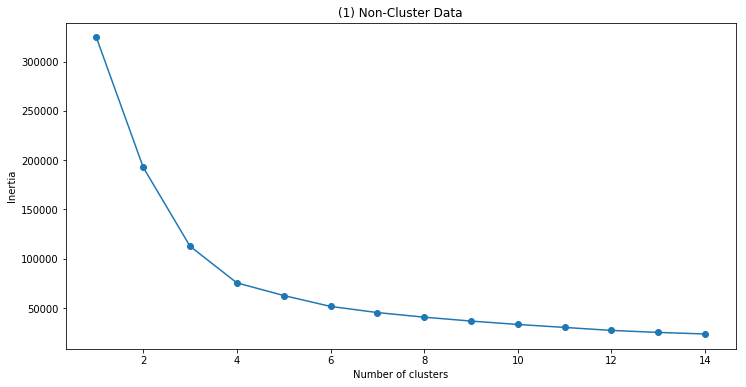

In [19]:
SSE = []
for cluster in range(1,15):
    kmeans1_ = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans1_.fit(X1)
    SSE.append(kmeans1_.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("(1) Non-Cluster Data")
plt.show()

We repeat this for each of our artificially generated datasets. 

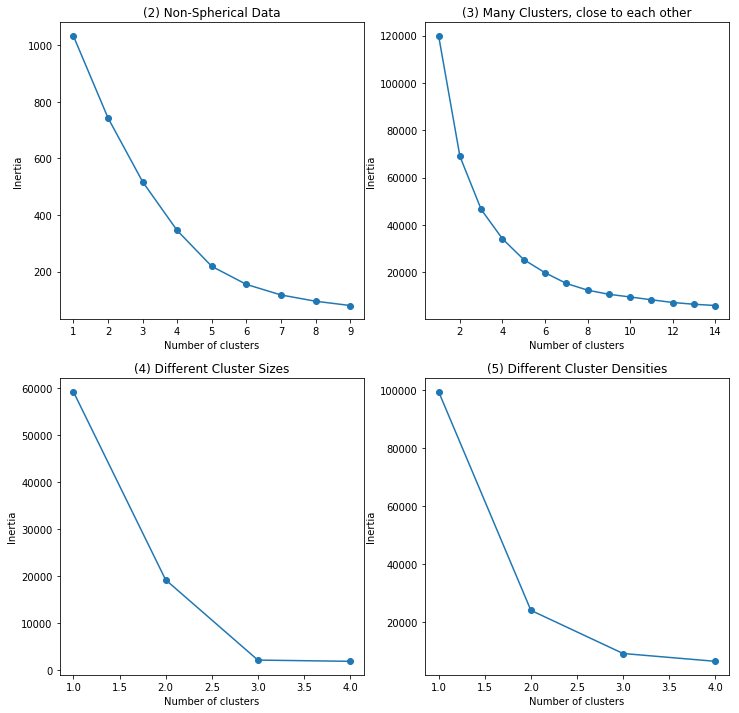

In [21]:
plt.figure(figsize=(12,12))

SSE = []
for cluster in range(1,10):
    kmeans2_ = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans2_.fit(X2)
    SSE.append(kmeans2_.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.subplot(221)
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("(2) Non-Spherical Data")

SSE = []
for cluster in range(1,15):
    kmeans3_ = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans3_.fit(X3)
    SSE.append(kmeans3_.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.subplot(222)
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("(3) Many Clusters, close to each other")

SSE = []
for cluster in range(1,5):
    kmeans4_ = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans4_.fit(X4)
    SSE.append(kmeans4_.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,5), 'SSE':SSE})
plt.subplot(223)
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("(4) Different Cluster Sizes")


SSE = []
for cluster in range(1,5):
    kmeans5_ = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans5_.fit(X5)
    SSE.append(kmeans5_.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,5), 'SSE':SSE})
plt.subplot(224)
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("(5) Different Cluster Densities")

plt.show()

Hence for the *(2) Non-Spherical Data"* we see that K-means does not perform well here. The groups are  non-spherical because k-means tends to pick spherical groups. The inertia drops after 5 as optimal cluster number, but we know we had 2 clusters initially.   
At the *(3) Many Clusters, close to each other* problem a value between 6 and 8 would be probably the most suitable.   
The K-Means algorithm performs well on the both last datasets. Regarding dataset 5 one should have in mind that K-Means is a distance-based algorithm, therefore this difference in the magnitude can create a problem.

#### Visualize the data 
Voronoi Diagrams -  clusters centers and borders  
  
We have determined a good choice for the number of clusters on each dataset.  We stick to our chosen algorithm to initialize the means in order to guarentee that the it will reach a "correct" solution - Kmeans++. Now we compute the Voronoi diagram generated by the centers with scipy. The centers are the blue points, which a a bit bigger. 

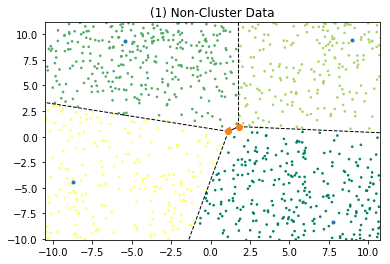

In [71]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X1) 
y_kmeans = kmeans.predict(X1)
# cluster index for each observation 
centers = kmeans.cluster_centers_ 
# cluster center coordinates 
vor = Voronoi(centers)
voronoi_plot_2d(vor)
plt.scatter(X1[:, 0], X1[:, 1], c=y_kmeans, marker='.', s=10, cmap='summer') 
plt.title("(1) Non-Cluster Data")
plt.show()

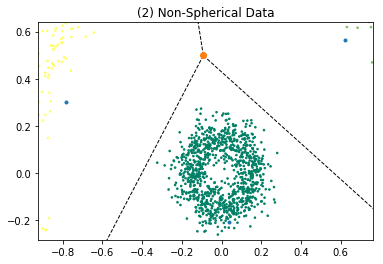

In [82]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X2) 
y_kmeans = kmeans.predict(X2)
centers = kmeans.cluster_centers_  
vor = Voronoi(centers)
voronoi_plot_2d(vor)
plt.scatter(X2[:, 0], X2[:, 1], c=y_kmeans, marker='.', s=10, cmap='summer') 
plt.title("(2) Non-Spherical Data")
plt.show()

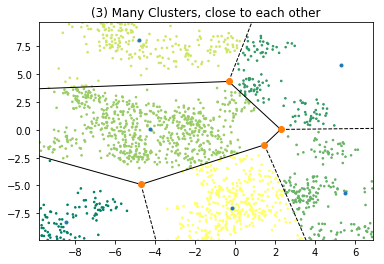

In [76]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X3) 
y_kmeans = kmeans.predict(X3) 
centers = kmeans.cluster_centers_  
vor = Voronoi(centers)
voronoi_plot_2d(vor)
plt.scatter(X3[:, 0], X3[:, 1], c=y_kmeans, marker='.', s=10, cmap='summer') 
plt.title("(3) Many Clusters, close to each other")
plt.show()

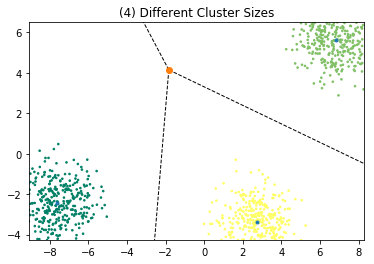

In [77]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X4) 
y_kmeans = kmeans.predict(X4)
centers = kmeans.cluster_centers_ 
vor = Voronoi(centers)
voronoi_plot_2d(vor)
plt.scatter(X4[:, 0], X4[:, 1], c=y_kmeans, marker='.', s=10, cmap='summer') 
plt.title("(4) Different Cluster Sizes")
plt.show()

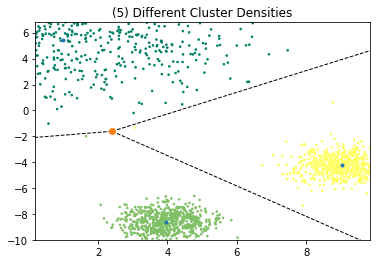

In [78]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X5) 
y_kmeans = kmeans.predict(X5)
centers = kmeans.cluster_centers_ 
vor = Voronoi(centers)
voronoi_plot_2d(vor)
plt.scatter(X5[:, 0], X5[:, 1], c=y_kmeans, marker='.', s=10, cmap='summer') 
plt.title("(5) Different Cluster Densities")
plt.show()

We chose more than two clusters for our non spherical datasets, as the Voronoi plot needs at least 3 points to construct an initial simplex. 

## 7.3 Unsupervised Learning: Hierarchical Clustering


Because of its nature agglomerative Clustering does not provide cluster centers and respectively voronoi plots. We plot the average linkage and the ward algorithm in comparison.  


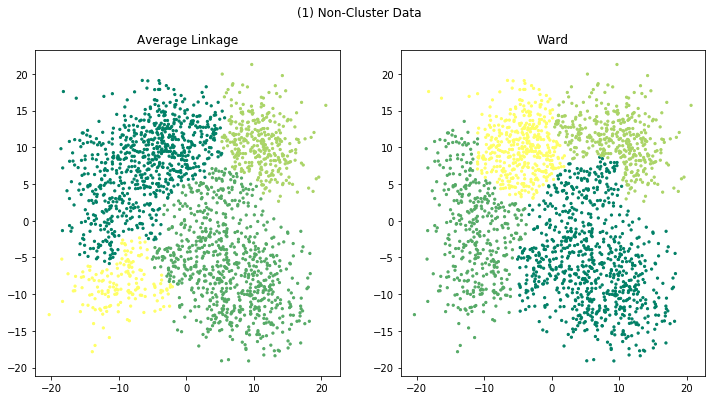

In [97]:

plt.figure(figsize=(12,6))
average = AgglomerativeClustering(n_clusters=4, linkage='average')
y_average = average.fit_predict(X1)
plt.subplot(121)
plt.scatter(X1[:, 0], X1[:, 1], c=y_average, marker='.', s=20, cmap='summer') 
plt.title("Average Linkage")
plt.suptitle("(1) Non-Cluster Data")

ward = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_ward = ward.fit_predict(X1)
plt.subplot(122)
plt.scatter(X1[:, 0], X1[:, 1], c=y_ward, marker='.', s=20, cmap='summer') 
plt.title("Ward")
plt.show()

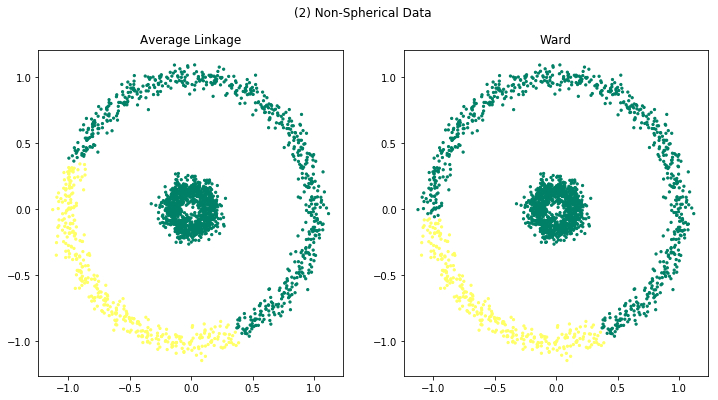

In [107]:

plt.figure(figsize=(12,6))
average = AgglomerativeClustering(n_clusters=2, linkage='average')
y_average = average.fit_predict(X2)
plt.subplot(121)
plt.scatter(X2[:, 0], X2[:, 1], c=y_average, marker='.', s=20, cmap='summer') 
plt.suptitle("(2) Non-Spherical Data")
plt.title("Average Linkage")

ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_ward = ward.fit_predict(X2)
plt.subplot(122)
plt.scatter(X2[:, 0], X2[:, 1], c=y_ward, marker='.', s=20, cmap='summer') 
plt.title("Ward")
plt.show()

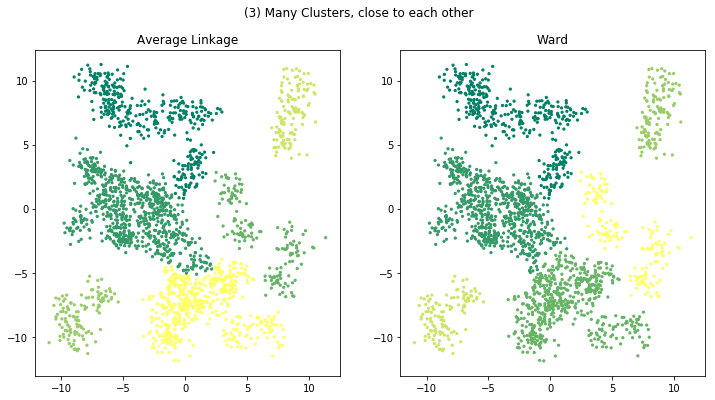

In [109]:
plt.figure(figsize=(12,6))
average = AgglomerativeClustering(n_clusters=6, linkage='average')
y_average = average.fit_predict(X3)
plt.subplot(121)
plt.scatter(X3[:, 0], X3[:, 1], c=y_average, marker='.', s=20, cmap='summer') 
plt.suptitle("(3) Many Clusters, close to each other")
plt.title("Average Linkage")

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
y_ward = ward.fit_predict(X3)
plt.subplot(122)
plt.scatter(X3[:, 0], X3[:, 1], c=y_ward, marker='.', s=20, cmap='summer') 
plt.title("Ward")
plt.show()

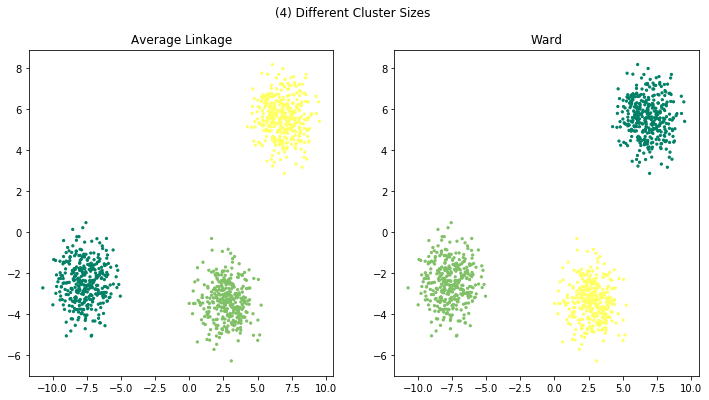

In [111]:
plt.figure(figsize=(12,6))
average = AgglomerativeClustering(n_clusters=3, linkage='average')
y_average = average.fit_predict(X4)
plt.subplot(121)
plt.scatter(X4[:, 0], X4[:, 1], c=y_average, marker='.', s=20, cmap='summer') 
plt.suptitle("(4) Different Cluster Sizes")
plt.title("Average Linkage")

ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_ward = ward.fit_predict(X4)
plt.subplot(122)
plt.scatter(X4[:, 0], X4[:, 1], c=y_ward, marker='.', s=20, cmap='summer') 
plt.title("Ward")
plt.show()

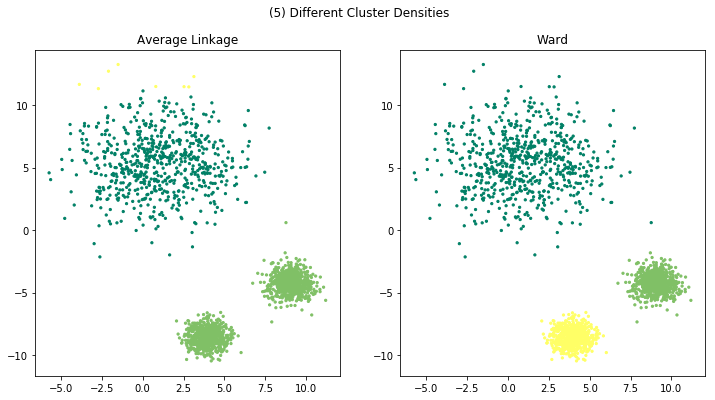

In [112]:
plt.figure(figsize=(12,6))
average = AgglomerativeClustering(n_clusters=3, linkage='average')
y_average = average.fit_predict(X5)
plt.subplot(121)
plt.scatter(X5[:, 0], X5[:, 1], c=y_average, marker='.', s=20, cmap='summer') 
plt.suptitle("(5) Different Cluster Densities")
plt.title("Average Linkage")

ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_ward = ward.fit_predict(X5)
plt.subplot(122)
plt.scatter(X5[:, 0], X5[:, 1], c=y_ward, marker='.', s=20, cmap='summer') 
plt.title("Ward")
plt.show()

* Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.  
*  Average linkage minimizes the average of the distances between all observations of pairs of clusters.  
  
  
At our dummy data sets Ward performs better on noisy data (3rd and 5th datasets). The complete linkage algorithm does well on  separated globular clusters, but has mixed results otherwise.  

    